In [1]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parent/'src'))
from data import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from fastai.data.all import *
from fastai.vision.all import *

/home/aberzl/mambaforge/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def rle_encode(img)->str:
    "Return run-length encoding string from `img`."
    pixels = np.concatenate([[0], img.flatten() , [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

def rle_decode(mask_rle:str, shape:Tuple[int,int]):
    "Return an image array from run-length encoded string `mask_rle` with `shape`."
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint)
    for low, up in zip(starts, ends): img[low:up] = 1
    return img.reshape(shape)

In [8]:
BASE = get_data_path(env='cdrive', folder='base')
TRN_ANN = get_data_path(env='cdrive', folder='train_annotations')
TRN_IMG = get_data_path(env='cdrive', folder='train_images')

In [9]:
train_df = pd.read_csv(BASE+'/train.csv')

In [10]:
Path(BASE+'/mask').mkdir(parents=True, exist_ok=True)

In [11]:
mask_path = Path(BASE+'/mask')
for index, row in train_df.iterrows():
    encoded_str = train_df.iloc[index]['rle']
    mask = rle_decode(mask_rle=encoded_str, shape=(row.img_width,row.img_height))
    im = Image.fromarray((mask * 255).astype(np.uint8))
    im.save(str(mask_path)+'/'+str(row.id)+'.png')

## Example Mask

In [6]:
encoded_str = train_df.iloc[1]['rle']; 

In [25]:
mask = rle_decode(mask_rle=encoded_str, shape=(3000,3000))

(-0.5, 2999.5, 2999.5, -0.5)

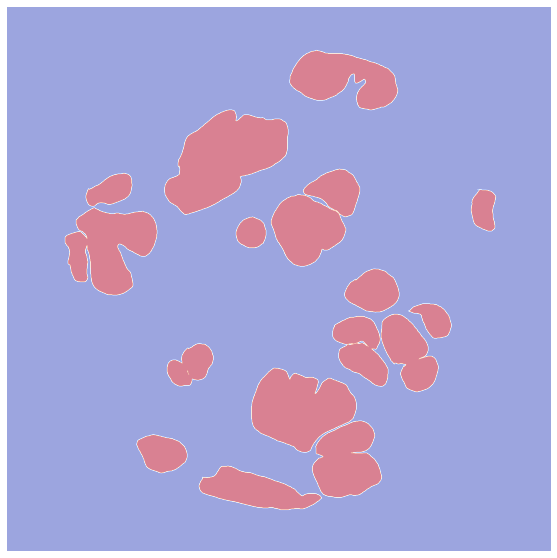

In [26]:
plt.figure(figsize=(10,10))
plt.imshow(mask, cmap='coolwarm', alpha=0.5)
plt.axis("off")